In [2]:
import pandas as pd
import joblib

In [ ]:
good_apple=pd.read_csv('/content/good_apple.csv')

In [ ]:
good_apple

,1,2,3,4,5,6,7,8,9,10,11
0,658,487,555,511,442,383,384,293,473,389,184
1,659,486,554,511,443,383,394,293,472,388,183
2,659,487,553,512,441,383,382,292,470,386,183
3,658,486,554,513,443,383,385,293,469,385,183
4,657,485,553,511,444,382,383,293,469,384,182
...,...,...,...,...,...,...,...,...,...,...,...
58122,653,479,545,508,447,385,353,345,315,296,251
58123,653,479,545,508,447,386,354,345,315,296,250
58124,653,479,545,508,447,385,354,344,315,296,251
58125,653,479,545,508,447,385,353,345,316,296,250


In [ ]:
bad_apple=pd.read_csv('/content/apple_bad.csv')

In [ ]:
bad_apple

,1,2,3,4,5,6,7,8,9,10,11
0,641,466,533,495,426,375,334,330,309,273,237
1,641,464,535,494,428,375,334,330,309,273,237
2,641,466,537,494,425,372,334,331,309,273,238
3,641,464,534,496,426,373,337,330,309,273,237
4,640,466,534,497,426,371,335,331,309,273,238
...,...,...,...,...,...,...,...,...,...,...,...
321134,583,512,606,532,528,462,439,426,423,405,542
321135,584,511,605,531,527,460,439,426,423,406,542
321136,584,510,599,530,527,460,438,426,423,405,543
321137,584,511,604,531,527,459,437,427,423,405,544


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Column2 vs Column1')

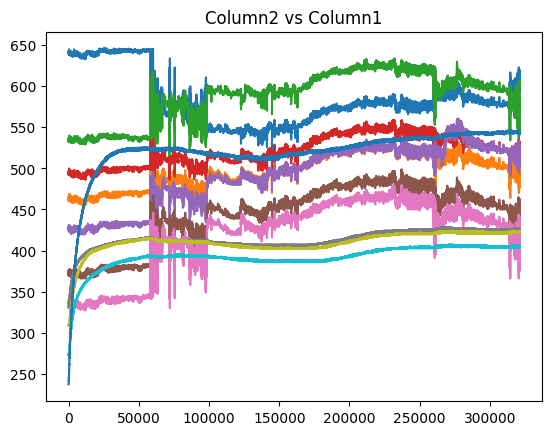

In [ ]:
plt.plot(bad_apple)
plt.title('Column2 vs Column1')

Text(0.5, 1.0, 'Column2 vs Column1')

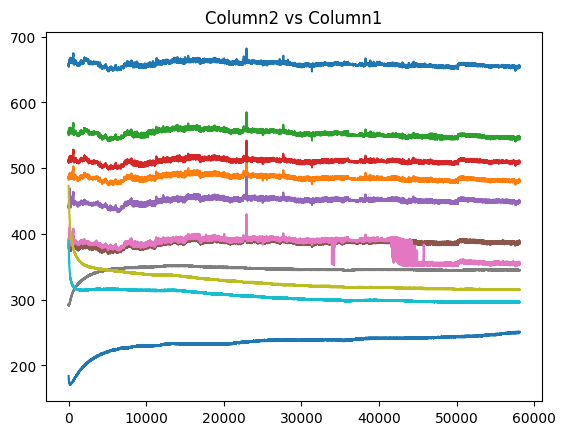

In [ ]:
plt.plot(good_apple)
plt.title('Column2 vs Column1')

In [ ]:
bad_apple=bad_apple[:55000]

In [ ]:
bad_apple['label']=1
good_apple['label']=0

<ipython-input-10-4a4498172622>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_apple['label']=1


In [ ]:
good_apple

,1,2,3,4,5,6,7,8,9,10,11,label
0,658,487,555,511,442,383,384,293,473,389,184,0
1,659,486,554,511,443,383,394,293,472,388,183,0
2,659,487,553,512,441,383,382,292,470,386,183,0
3,658,486,554,513,443,383,385,293,469,385,183,0
4,657,485,553,511,444,382,383,293,469,384,182,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58122,653,479,545,508,447,385,353,345,315,296,251,0
58123,653,479,545,508,447,386,354,345,315,296,250,0
58124,653,479,545,508,447,385,354,344,315,296,251,0
58125,653,479,545,508,447,385,353,345,316,296,250,0


In [ ]:
final_data_frame = pd.concat([bad_apple, good_apple], ignore_index=True)

In [ ]:
columns_to_remove = ['8', '9','10','11']
final_data_frame = final_data_frame.drop(columns_to_remove, axis=1)

In [ ]:
final_data_frame

,1,2,3,4,5,6,7,label
0,641,466,533,495,426,375,334,1
1,641,464,535,494,428,375,334,1
2,641,466,537,494,425,372,334,1
3,641,464,534,496,426,373,337,1
4,640,466,534,497,426,371,335,1
...,...,...,...,...,...,...,...,...
113122,653,479,545,508,447,385,353,0
113123,653,479,545,508,447,386,354,0
113124,653,479,545,508,447,385,354,0
113125,653,479,545,508,447,385,353,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = final_data_frame.drop('label', axis=1)
y = final_data_frame['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(7, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=10, verbose=1)

Epoch 1/3
9051/9051 [==============================] - 16s 2ms/step - loss: 1.8088 - accuracy: 0.8887
Epoch 2/3
9051/9051 [==============================] - 15s 2ms/step - loss: 0.1299 - accuracy: 0.9762
Epoch 3/3
9051/9051 [==============================] - 16s 2ms/step - loss: 0.0603 - accuracy: 0.9900


In [ ]:
from keras.models import load_model

model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import model_from_json

# Serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# import pickle
# from sklearn.ensemble import RandomForestRegressor
# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)
joblib.dump(clf, 'random')

['random']

In [ ]:
model2= joblib.load('random')

In [ ]:
X_train

,1,2,3,4,5,6,7
106585,657,483,549,511,451,388,356
71971,663,491,560,515,454,390,393
106110,659,486,552,514,454,391,360
76222,659,487,555,510,451,386,389
3277,637,459,533,492,424,369,332
...,...,...,...,...,...,...,...
76820,662,489,558,513,455,390,394
110268,655,481,546,509,449,386,354
103694,653,480,546,508,448,385,353
860,640,464,536,494,426,373,337


In [ ]:
l1=X_train

In [ ]:
# l1_reshaped = l1.reshape(-1, 1)

In [ ]:
y_pred=model2.predict(X_train)

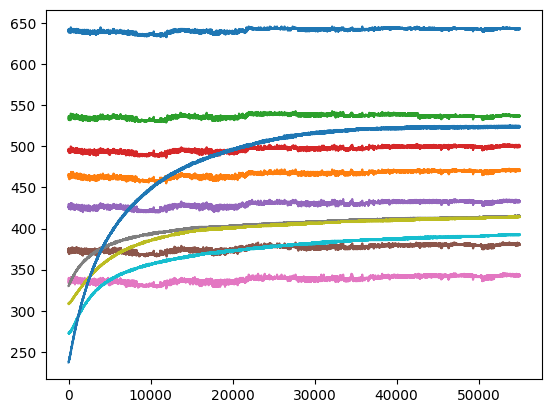

In [ ]:
plt.plot(bad_apple)

In [22]:
milk_fresh=pd.read_csv('/content/milk_fresh.csv')
milk_old=pd.read_csv('/content/milk_old.csv')

In [17]:
final_data_frame = pd.concat([milk_fresh, milk_old], ignore_index=True)

In [18]:
final_data_frame

,mq4,mq6,mq7,mq5,mq8,mq135,mq2,gm102b,gm302b,gm502b,gm702b
0,586,406,494,391,362,311,299,319,286,260,279
1,585,408,494,390,361,311,299,318,286,261,279
2,585,407,494,390,362,310,299,318,286,261,279
3,586,408,494,390,361,310,298,319,286,261,278
4,585,407,493,390,361,311,299,319,286,260,279
...,...,...,...,...,...,...,...,...,...,...,...
64301,607,427,578,402,391,328,317,322,306,288,393
64302,606,426,577,403,392,328,317,322,306,288,393
64303,606,427,578,403,392,328,316,321,306,288,393
64304,606,426,578,402,391,329,317,321,305,288,393


In [6]:
import pandas as pd
import numpy as np

def exponential_decay(total_steps, current_step):
    decay_rate = -np.log(0.01) / total_steps
    return 10 * np.exp(-decay_rate * current_step)

total_steps = len(final_data_frame) - 1  # Total number of rows in the dataframe
final_data_frame['quality'] = final_data_frame.index.map(lambda x: exponential_decay(total_steps, x))

print(final_data_frame)


       mq4  mq6  mq7  mq5  mq8  mq135  mq2  gm102b  gm302b  gm502b  gm702b  \
0      586  406  494  391  362    311  299     319     286     260     279   
1      585  408  494  390  361    311  299     318     286     261     279   
2      585  407  494  390  362    310  299     318     286     261     279   
3      586  408  494  390  361    310  298     319     286     261     278   
4      585  407  493  390  361    311  299     319     286     260     279   
...    ...  ...  ...  ...  ...    ...  ...     ...     ...     ...     ...   
64301  607  427  578  402  391    328  317     322     306     288     393   
64302  606  426  577  403  392    328  317     322     306     288     393   
64303  606  427  578  403  392    328  316     321     306     288     393   
64304  606  426  578  402  391    329  317     321     305     288     393   
64305  606  427  577  403  391    329  316     322     306     288     393   

          quality  
0      100.000000  
1       99.992839  
2  

In [7]:
final_data_frame.to_csv('data.csv', index=False)

In [ ]:
# columns_to_remove = ['mq3', 'mq9','Temperature','Humidity']
# milk = milk.drop(columns_to_remove, axis=1)

In [8]:
final_data_frame

,mq4,mq6,mq7,mq5,mq8,mq135,mq2,gm102b,gm302b,gm502b,gm702b,quality
0,586,406,494,391,362,311,299,319,286,260,279,100.000000
1,585,408,494,390,361,311,299,318,286,261,279,99.992839
2,585,407,494,390,362,310,299,318,286,261,279,99.985678
3,586,408,494,390,361,310,298,319,286,261,278,99.978518
4,585,407,493,390,361,311,299,319,286,260,279,99.971358
...,...,...,...,...,...,...,...,...,...,...,...,...
64301,607,427,578,402,391,328,317,322,306,288,393,1.000286
64302,606,426,577,403,392,328,317,322,306,288,393,1.000215
64303,606,427,578,403,392,328,316,321,306,288,393,1.000143
64304,606,426,578,402,391,329,317,321,305,288,393,1.000072


In [9]:
X=final_data_frame.drop('quality',axis=1)
y=final_data_frame['quality']

In [10]:
X

,mq4,mq6,mq7,mq5,mq8,mq135,mq2,gm102b,gm302b,gm502b,gm702b
0,586,406,494,391,362,311,299,319,286,260,279
1,585,408,494,390,361,311,299,318,286,261,279
2,585,407,494,390,362,310,299,318,286,261,279
3,586,408,494,390,361,310,298,319,286,261,278
4,585,407,493,390,361,311,299,319,286,260,279
...,...,...,...,...,...,...,...,...,...,...,...
64301,607,427,578,402,391,328,317,322,306,288,393
64302,606,426,577,403,392,328,317,322,306,288,393
64303,606,427,578,403,392,328,316,321,306,288,393
64304,606,426,578,402,391,329,317,321,305,288,393


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(7, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.fit(X_train, y_train, epochs=3, batch_size=10, verbose=1)
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print('Mean Absolute Error:', mae)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Epoch 1/3
 1548/12524 [==>...........................] - ETA: 41s - loss: 621.2106 - mae: 19.6763

KeyboardInterrupt: 

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

def r2_score_metric(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', r2_score_metric])
model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=1, validation_data=(X_test, y_test))
loss, mae ,r2= model.evaluate(X_test, y_test, verbose=0)
print('Mean Absolute Error:', mae)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# # Compute R^2 score for test data
# r2_test = r2_score(y_test, y_pred)
# print('R^2 Score (Test Data):', r2_test)

# # Compute R^2 score for train data
# y_train_pred = model.predict(X_train)
# r2_train = r2_score(y_train, y_train_pred)
# print('R^2 Score (Train Data):', r2_train)


Epoch 1/5
5145/5145 [==============================] - 25s 4ms/step - loss: 904.4485 - mae: 21.2743 - r2_score_metric: -2.1685 - val_loss: 521.3851 - val_mae: 17.2211 - val_r2_score_metric: -0.1061
Epoch 2/5
5145/5145 [==============================] - 21s 4ms/step - loss: 219.3818 - mae: 9.6996 - r2_score_metric: 0.5026 - val_loss: 31.5876 - val_mae: 3.7205 - val_r2_score_metric: 0.9157
Epoch 3/5
5145/5145 [==============================] - 21s 4ms/step - loss: 25.8216 - mae: 3.5653 - r2_score_metric: 0.9187 - val_loss: 16.5579 - val_mae: 2.8734 - val_r2_score_metric: 0.9524
Epoch 4/5
5145/5145 [==============================] - 23s 4ms/step - loss: 18.1338 - mae: 2.9891 - r2_score_metric: 0.9468 - val_loss: 20.6733 - val_mae: 3.3536 - val_r2_score_metric: 0.9359
Epoch 5/5
5145/5145 [==============================] - 22s 4ms/step - loss: 14.0656 - mae: 2.6880 - r2_score_metric: 0.9601 - val_loss: 10.4056 - val_mae: 2.3982 - val_r2_score_metric: 0.9689
Mean Absolute Error: 2.3982231616

In [ ]:
# Load model architecture from JSON
from keras.models import model_from_json

with open('milk_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Create model
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("milk_model.h5")

In [21]:
model.predict([[586,400,500,400,311,320,300,330,300,250,280]])

1/1 [==============================] - 0s 31ms/step


array([[133.09897]], dtype=float32)

In [14]:
from keras.models import load_model

model.save('model1.h5')

In [15]:
from keras.models import model_from_json

# Serialize model to JSON
model_json = model.to_json()
with open("milk_model1.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
loss, mae ,r2= model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2',r2)


979/979 [==============================] - 1s 1ms/step
Mean Squared Error: 8.903340005122715
R2 0.9837275743484497
